<a href="https://colab.research.google.com/github/pragneshrana/SignalProcessing_MachineLearning/blob/main/LSTM_Human_Activity_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Signal Processing and Machine Learning
---



### What is Signal?
- Signal is just a fucntion form to represent the information
- It combines physical simulation, mathematics and information

### What is signal processing ?
- It convert signals into another form
- Information exraction and interpretation 
    - Speech recognition
    - Computer vision

#### Examples:
 - Audio Recording : analong pressure wave is converted into one-dimentional array
 - Photos : Analog scene of light is samples using CCD array and stored as a two-dimentional array
 - Text : Collection of char which further signes with 16 bit number
 - Ratings : movies, books are stores using 0-5
 

Process: 

Model : Voices -> Feature Extrcation -> Pitch / MMCC -> Model Training 

Unknown Voice : Feature Extraction -> Pitch / MMCC -> Prediction using Model -> Speaker


#### In case of human body, 
- Activity signal -> featre extraction -> Model training -> Activity Inference

(Ref : http://web.stanford.edu/class/ee269/Lecture1.pdf)

- Generate the dataset
    - Data sourcces
    - Simulation
    - Labelling and Supervised learning 
- Preprocess and tranform data
    - Pre-Processing
    - Transformation
    - Feature extraction
    - Visulization by time, frquency, and time-frequency domain
- Develope Predictive Models
    - Refrence Models
    - Hardware-Acceleated training 
    - Analyze and tune hyper-parameter
    - Time series models : Visual Inspection of over time
    - Frequency domain analysis: Time series domain shows signal's energy distributed over time whereas, frequency domain representation includes information on the phase shift that must be applied to each frequency component in order to recover the original time signal with a combination of all the individual frequency components (FFT o DFT)
    - **LSTM for human Activity recognition (HAR)**
        - sensor based HAR
            - wearables for humanbody
        - External Device
        - Sensory output data -> input data segmentation -> LSTM based model -> combine with per time step prediction 
        - Ref : https://www.mdpi.com/1424-8220/17/11/2556/htm
             - They have used three models, 
                 - Unidirectional LSTM
                 - Bidirectional LSTM
                 - Cascade Bidorectional LSTM
- Accelerate and Deploy
    - Apps
    - Enterprise Systems
    - Embedded Devices and Hardware
    
     

For the sake of example, Human Activity dataset is used and LSTM model is applied to predict human activity.


About this Dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/pragneshrana/SignalProcessing_MachineLearning/main/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/pragneshrana/SignalProcessing_MachineLearning/main/data/test.csv')

In [3]:
train.columns


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [4]:
train.shape

(7352, 563)

In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [6]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [7]:
test.shape


(2947, 563)

In [8]:
X_train_raw = train.iloc[:,:-2]
Y_train_raw = train.iloc[:,-1]

print(X_train_raw.shape)
print(Y_train_raw.shape)


(7352, 561)
(7352,)


In [9]:
X_test_raw = test.iloc[:,:-2]
Y_test_raw = test.iloc[:,-1]
print(X_test_raw.shape)
print(Y_test_raw.shape)

(2947, 561)
(2947,)


In [10]:
 from sklearn.preprocessing import LabelBinarizer
 encoder = LabelBinarizer()
 Y_train = encoder.fit_transform(Y_train_raw)
 Y_test = encoder.fit_transform(Y_test_raw)
 # inverse transform -- predictions_test = le.inverse_transform(prediction_test)
print(Y_train.shape)
print(Y_test.shape)

(7352, 6)
(2947, 6)


In [11]:
TRAIN_LEN = len(X_train_raw)  
TEST_LEN = len(X_test_raw)  
NUM_STEPS = X_train_raw.shape[0] 
NUM_FEATURES = X_train_raw.shape[1]
NUM_HIDDEN = 32
NUM_CLASSES = 6
LR = 0.0025
LAMBDA = 0.0020
NUM_ITERS = 100  
BATCH_SIZE = 400

Basics of LSTM:

input dimention :
  - batch_size, timesteps, input_dim


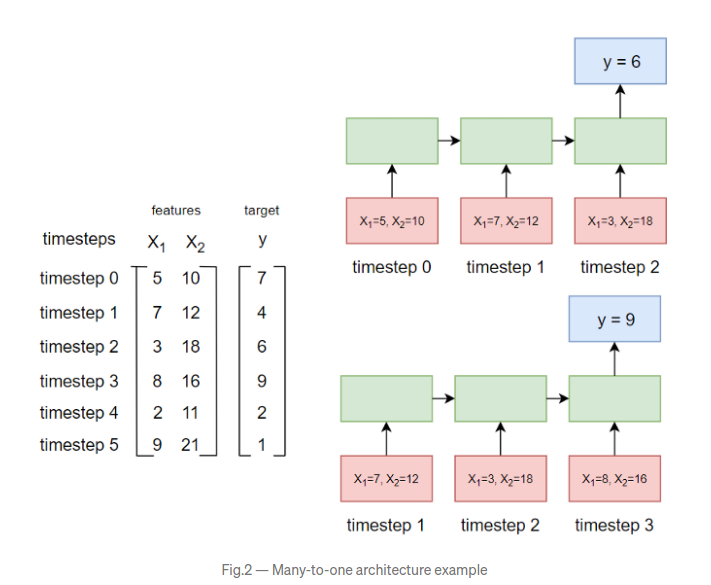

In [12]:
'''
Sliding Window aproach
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
    for sliding window approach """    # Prepare the list for the transformed data
        X, y = list(), list()    # Loop of the entire data set
        for i in range(x_data.shape[0]):
            # compute a new (sliding window) index
            end_ix = i + num_steps        # if index is larger than the size of the dataset, we stop
            if end_ix >= x_data.shape[0]:
                break        # Get a sequence of data for x
            seq_X = x_data[i:end_ix]
            # Get only the last element of the sequency for y
            seq_y = y_data[end_ix]        # Append the list with sequencies
            X.append(seq_X)
            y.append(seq_y)    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)    
    return x_array, y_array
'''


'\nSliding Window aproach\ndef lstm_data_transform(x_data, y_data, num_steps=5):\n    """ Changes data to the format for LSTM training \n    for sliding window approach """    # Prepare the list for the transformed data\n        X, y = list(), list()    # Loop of the entire data set\n        for i in range(x_data.shape[0]):\n            # compute a new (sliding window) index\n            end_ix = i + num_steps        # if index is larger than the size of the dataset, we stop\n            if end_ix >= x_data.shape[0]:\n                break        # Get a sequence of data for x\n            seq_X = x_data[i:end_ix]\n            # Get only the last element of the sequency for y\n            seq_y = y_data[end_ix]        # Append the list with sequencies\n            X.append(seq_X)\n            y.append(seq_y)    # Make final arrays\n    x_array = np.array(X)\n    y_array = np.array(y)    \n    return x_array, y_array\n'

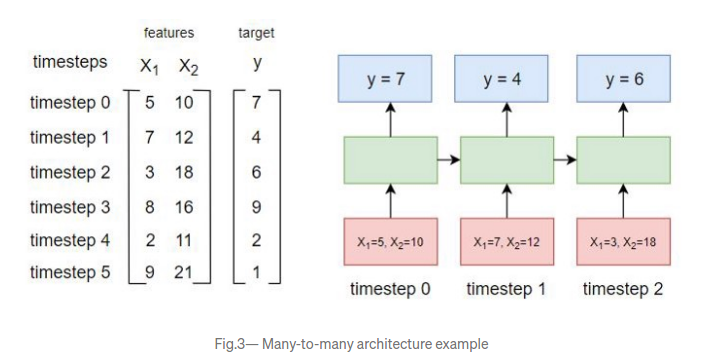

In [13]:
# Many to many training for 3 features and 1 output 
'''
num_steps = 3
# training set
x_train_shaped = np.reshape(x_train_sc, newshape=(-1, num_steps, 3))
y_train_shaped = np.reshape(y_train_sc, newshape=(-1, num_steps, 3))
assert x_train_shaped.shape[0] == y_train_shaped.shape[0]
# test set
x_test_shaped = np.reshape(x_test_sc, newshape=(-1, num_steps, 3))
y_test_shaped = np.reshape(y_test_sc, newshape=(-1, num_steps, 3))
assert x_test_shaped.shape[0] == y_test_shaped.shape[0]
'''

'\nnum_steps = 3\n# training set\nx_train_shaped = np.reshape(x_train_sc, newshape=(-1, num_steps, 3))\ny_train_shaped = np.reshape(y_train_sc, newshape=(-1, num_steps, 3))\nassert x_train_shaped.shape[0] == y_train_shaped.shape[0]\n# test set\nx_test_shaped = np.reshape(x_test_sc, newshape=(-1, num_steps, 3))\ny_test_shaped = np.reshape(y_test_sc, newshape=(-1, num_steps, 3))\nassert x_test_shaped.shape[0] == y_test_shaped.shape[0]\n'

In [14]:
# Many to one training for 3 features and 1 output
'''
num_steps = 3# training set
(x_train_transformed,
 y_train_transformed) = lstm_data_transform(x_train_sc, y_train_sc, num_steps=num_steps)
assert x_train_transformed.shape[0] == y_train_transformed.shape[0]# test set
(x_test_transformed,
 y_test_transformed) = lstm_data_transform(x_test_sc, y_test_sc, num_steps=num_steps)
assert x_test_transformed.shape[0] == y_test_transformed.shape[0]
'''

'\nnum_steps = 3# training set\n(x_train_transformed,\n y_train_transformed) = lstm_data_transform(x_train_sc, y_train_sc, num_steps=num_steps)\nassert x_train_transformed.shape[0] == y_train_transformed.shape[0]# test set\n(x_test_transformed,\n y_test_transformed) = lstm_data_transform(x_test_sc, y_test_sc, num_steps=num_steps)\nassert x_test_transformed.shape[0] == y_test_transformed.shape[0]\n'

In [15]:
X_train = np.reshape(X_train_raw.to_numpy(), newshape=(TRAIN_LEN, 1,NUM_FEATURES))
X_test = np.reshape(X_test_raw.to_numpy(), newshape=(TEST_LEN, 1,NUM_FEATURES))


In [16]:

regressor = keras.Sequential([layers.LSTM(units = NUM_HIDDEN, activation = 'relu',input_shape = (NUM_STEPS, NUM_FEATURES),return_sequences = True), #input shape looks like (batch_size, time_steps, units)
                        layers.LSTM(units =NUM_HIDDEN,  return_sequences = True),
                        layers.Dropout(0.2),
                        layers.LSTM(units=NUM_HIDDEN,unit_forget_bias=1.0),
                        layers.Dense(15),
                        layers.Dense(6)])
print(regressor.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7352, 32)          76032     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7352, 32)          8320      
_________________________________________________________________
dropout (Dropout)            (None, 7352, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 15)                495       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 96        
Total params: 93,263
Trainable params: 93,263
Non-trainable params: 0
____________________________________________________

In [17]:
print(X_train.shape)
print(Y_train)

(7352, 1, 561)
[[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [18]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs=NUM_ITERS, batch_size=BATCH_SIZE)

Epoch 1/100
19/19 [==============================] - 0s 11ms/step - loss: 0.1444
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.1074
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0803
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0551
Epoch 5/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0403
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0304
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0240
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 9/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0184
Epoch 10/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 11/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0141
Epoch 12/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 13/100
19/19 [=====

In [19]:
y_pred_train = regressor.predict(X_train)

In [20]:
correct_pred = tf.equal(tf.argmax(y_pred_train), tf.argmax(Y_train))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [21]:
print(accuracy)

tf.Tensor(0.0, shape=(), dtype=float32)


In [30]:
y_pred_test = regressor.predict(X_test)
correct_pred_test = tf.equal(tf.argmax(y_pred_test,1), tf.argmax(Y_test,1))
accuracy_test = tf.reduce_mean(tf.cast(correct_pred_test, tf.float32))


In [31]:
predictions_test = encoder.inverse_transform(y_pred_test)
print(predictions_test)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']


In [32]:
print(accuracy_test)

tf.Tensor(0.9524941, shape=(), dtype=float32)


In [33]:
from sklearn.metrics import confusion_matrix
y_unique = np.unique(predictions_test)
mcm = confusion_matrix(Y_test_raw, predictions_test, labels = y_unique)
mcm

array([[532,   0,   5,   0,   0,   0],
       [  0, 451,  39,   0,   0,   1],
       [  0,  35, 497,   0,   0,   0],
       [  0,   0,   0, 488,   2,   6],
       [  0,   0,   0,   3, 390,  27],
       [  0,   0,   0,  21,   1, 449]])